<a href="https://colab.research.google.com/github/dnguyend/rayleigh_newton/blob/master/colab/CompareWithONCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/dnguyend/rayleigh_newton

Cloning into 'rayleigh_newton'...
remote: Enumerating objects: 335, done.
remote: Counting objects: 100% (335/335), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 335 (delta 178), reused 268 (delta 138), pack-reused 0
Receiving objects: 100% (335/335), 14.86 MiB | 18.79 MiB/s, done.
Resolving deltas: 100% (178/178), done.


# Read the matlab file comparing O-NCM and Schur run.
They are both matlab implementations, the code is in https://github.com/dnguyend/rayleigh_newton/matlab folder - O-NCM is in orthorgonal_newton_correction_method.m, which is from https://github.com/arJaffe/NCM - schur implementation are in schur_form_rayleigh_raw (following O-NCM, computing lambda and T_x_m2 separately), and schur_form_rayleigh, rearranging the code sequence so we can compute lamdbda from T_x_m2.

We run 21 different pairs of tensors. For each each tensor we run 300 initial values to get different eigenvalues.

In [2]:
from IPython.display import display, HTML
import numpy as np
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt

res = loadmat('rayleigh_newton/matlab/matlab_save_res.mat')
n_scenarios = res['save_res'].shape[0]
save_mean = np.zeros((n_scenarios, 6))
save_mean_not_2 = np.zeros((n_scenarios, 3))
for j in range(n_scenarios):
    # res['save_res'][j, 1]
    # has shape # trial tensors (20)
    # n_initials
    # 12 for results: 0, 4, 8: lambda
    # 1, 5, 9: iteration counts
    # 2, 6, 10: time
    # 3, 7, 11: convergence
    # so we take average over the first two dimensions

    tot_time = res['save_res'][j, 1][:, :, 2+4*np.arange(3)].mean(
        axis=(0, 1))
    tot_time_save = 1 - tot_time / tot_time[0]

    print("mean_time m=%d n=%d orth=%f schur_raw=%f schur=%f ::: schur_raw_save=%f schur_save=%f" %
          tuple(list(res['save_res'][j, 0][0, :]) +
                list(res['save_res'][j, 1][:, :, 2+4*np.arange(3)].mean(
                    axis=(0, 1))) + list(tot_time_save[1:])))

    save_mean[j, :3] += res['save_res'][j, 1][:, :, 2+4*np.arange(3)].mean(
        axis=(0, 1))

    if res['save_res'][j, 0][0, 1] > 2:
        save_mean_not_2[j, :] += res['save_res'][j, 1][:, :, 2+4*np.arange(3)].mean(
        axis=(0, 1))

    """
    print("mean_itr m=%d n=%d orth=%f schur_raw=%f schur=%f" %
          tuple(list(res['save_res'][j, 0][0, :]) +
                list(res['save_res'][j, 1][:, :, 1+4*np.arange(3)].mean(
                    axis=(0, 1)))))
    """
    save_mean[j, 3:] += res['save_res'][j, 1][:, :, 1+4*np.arange(3)].mean(
                    axis=(0, 1))
    """
    print("mean_conv  m=%d n=%d orth=%f schur_raw=%f schur=%f" %
          tuple(list(res['save_res'][j, 0][0, :]) +
                list(res['save_res'][j, 1][:, :, 3+4*np.arange(3)].mean(
                    axis=(0, 1)))))
    """
print("total mean orth=%f schur_raw=%f schur=%f" %
      tuple(save_mean.mean(axis=0)[-3:]))



mean_time m=3 n=2 orth=0.000239 schur_raw=0.000269 schur=0.000211 ::: schur_raw_save=-0.122425 schur_save=0.118058
mean_time m=3 n=3 orth=0.000559 schur_raw=0.000449 schur=0.000364 ::: schur_raw_save=0.196042 schur_save=0.348303
mean_time m=3 n=4 orth=0.000471 schur_raw=0.000401 schur=0.000317 ::: schur_raw_save=0.147909 schur_save=0.326577
mean_time m=3 n=5 orth=0.000628 schur_raw=0.000543 schur=0.000442 ::: schur_raw_save=0.135198 schur_save=0.296751
mean_time m=3 n=6 orth=0.000884 schur_raw=0.000685 schur=0.000563 ::: schur_raw_save=0.225233 schur_save=0.362521
mean_time m=3 n=7 orth=0.000806 schur_raw=0.000628 schur=0.000509 ::: schur_raw_save=0.220934 schur_save=0.368153
mean_time m=3 n=8 orth=0.001067 schur_raw=0.000838 schur=0.000679 ::: schur_raw_save=0.215071 schur_save=0.363419
mean_time m=3 n=9 orth=0.001120 schur_raw=0.000929 schur=0.000777 ::: schur_raw_save=0.170665 schur_save=0.306390
mean_time m=4 n=2 orth=0.000186 schur_raw=0.000211 schur=0.000163 ::: schur_raw_save=-0

Comparing time and iterations

In [3]:
df = pd.DataFrame(np.empty((n_scenarios, save_mean.shape[1])), columns=['time_oncm', 'time_schur_raw', 'time_schur',
                                                                       'iter_oncm', 'iter_schur_raw', 'iter_schur'],
                  index=res['save_res'][:, 0])

df.iloc[:, :2] = np.empty((n_scenarios, 2), dtype=np.int64)
#df.names
for i in range(n_scenarios):
  #  df.iloc[i, :2] = res['save_res'][i, 0]
  df.iloc[i, :] = save_mean[i, :]

df.mean()


time_oncm          0.000550
time_schur_raw     0.000460
time_schur         0.000363
iter_oncm         17.175730
iter_schur_raw    17.212921
iter_schur        17.231127
dtype: float64

Display by tensor pairs.

In [4]:
df

,time_oncm,time_schur_raw,time_schur,iter_oncm,iter_schur_raw,iter_schur
"[[3, 2]]",0.000239,0.000269,0.000211,12.075000,12.235833,12.242333
"[[3, 3]]",0.000559,0.000449,0.000364,19.577167,19.586833,19.669333
"[[3, 4]]",0.000471,0.000401,0.000317,17.055667,17.256667,16.916500
"[[3, 5]]",0.000628,0.000543,0.000442,22.285167,22.338667,22.278000
"[[3, 6]]",0.000884,0.000685,0.000563,26.940833,27.098333,27.481167
"[[3, 7]]",0.000806,0.000628,0.000509,24.516167,24.278000,24.257667
"[[3, 8]]",0.001067,0.000838,0.000679,31.154500,31.403833,31.232833
"[[3, 9]]",0.001120,0.000929,0.000777,30.802833,30.974333,31.096333
"[[4, 2]]",0.000186,0.000211,0.000163,9.325333,9.325333,9.325333
"[[4, 3]]",0.000337,0.000268,0.000209,11.478500,11.452500,11.511833


# Comparing $\lambda$

In [5]:
lbd_fr = pd.DataFrame(res['save_res'][0, 1][0, :, [0, 4, 8]].T)
display(lbd_fr)
# pd.DataFrame(res['save_res'][0, 1][:, 0:3][0, :, :])


# plt.plot(lbd_fr.)


,0,1,2
0,-0.302333,-0.302333,-0.302333
1,-1.123068,-1.123068,-1.123068
2,-0.302333,-0.302333,-0.302333
3,0.723350,0.723350,0.723350
4,-0.723350,-0.723350,-0.723350
...,...,...,...
295,0.723350,0.723350,0.723350
296,1.123068,1.123068,1.123068
297,-1.123068,-1.123068,-1.123068
298,-0.302333,-0.302333,-0.302333


They agree upto 1e-16 in this case. There are more discrepencies for some other cases.

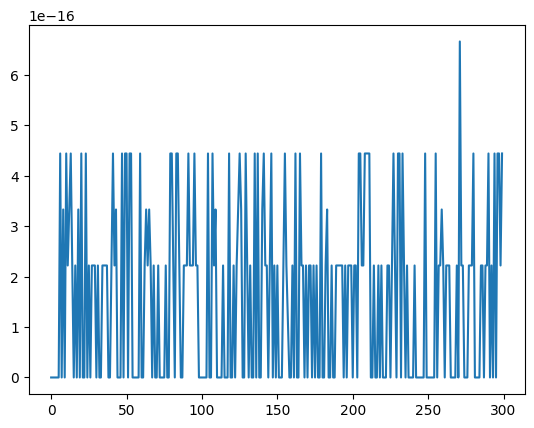

In [6]:
plt.plot(np.abs(lbd_fr[0]/ lbd_fr[1]-1))

Another case where there are more discrepencies. But it means they may converge to a different eigenvalue. Take entry [14, 1], corresponding to the $m=4, n=8$ tensor above, for one of the $300$ initial values

In [7]:

lbd_fr = pd.DataFrame(res['save_res'][14, 1][0, :, [0, 4, 8]].T)
display(pd.DataFrame(np.abs(lbd_fr[0]/ lbd_fr[1]-1)).describe())
display(pd.DataFrame(np.abs(lbd_fr[0]/ lbd_fr[1]-1)).quantile(q=.8))
display(pd.DataFrame(np.abs(lbd_fr[0]/ lbd_fr[1]-1)).quantile(q=.99))

,0
count,3.000000e+02
mean,4.964502e-01
std,2.214457e+00
min,0.000000e+00
25%,2.220446e-16
50%,2.775558e-16
75%,6.661338e-16
max,2.363130e+01


0    1.021405e-15
Name: 0.8, dtype: float64

0    9.844234
Name: 0.99, dtype: float64

# Show Schur and O-NCM give identical steps I
Modify the code to print 5 steps to show two interation produce the same steps:


In [8]:
from rayleigh_newton.core.utils import tv_mode_product
import scipy
import numpy.linalg as la
from numpy import eye, concatenate
from numpy.linalg import inv, solve, norm

def orthogonal_newton_correction_method(
        T, max_itr, delta, x_init=None, use_cholesky=True, print_steps=5):
    """function [x,lambda,ctr,converge] =
          orthogonal_newton_correction_method(T,max_itr,delta,x_init)

     Original matlab Code by Ariel Jaffe, Roi Weiss and Boaz Nadler
     2017, Weizmann Institute of Science
     ---------------------------------------------------------
    % DESCRIPTION:
    % 	This function implements the orthogonal Newton correction method
    %   for computing real eigenpairs of symmetric tensors
    %
    % Input:    T - A real and symmetric tensor
    %           max_itr - maximum number of iterations until
    %                     termination
    %           delta - convergence threshold
    %           x_init(opt) - initial point
    %
    % DEFAULT:
    %   if nargin<4 x_init is chosen randomly over the unit sphere
    %
    % Output:   x - output eigenvector
    %           ctr - number of iterations till convergence
    %           run_time - time till convergence
    %           convergence (1- converged)
    % ---------------------------------------------------------
    % FOR MORE DETAILS SEE:
    %   A. Jaffe, R. Weiss and B. Nadler.
    %   Newton correction methods for computing
    %   real eigenpairs of symmetric tensors (2017)
    % ---------------------------------------------------------
    """
    # get tensor dimensionality and order
    n_vec = T.shape
    m = len(n_vec)
    n = T.shape[0]
    R = 1
    converge = False

    # if not given as input, randomly initialize
    if x_init is None:
        x_init = np.random.randn(n)
        x_init = x_init/norm(x_init)

    # init lambda_(k) and x_(k)
    lbd = tv_mode_product(T, x_init, m)
    x_k = x_init.copy()
    ctr = 0

    while (R > delta) and (ctr < max_itr):
        # compute T(I,I,x_k,...,x_k), T(I,x_k,...,x_k) and g(x_k)
        T_x_m_2 = tv_mode_product(T, x_k, m-2)
        T_x_m_1 = T_x_m_2 @ x_k
        g = -lbd * x_k + T_x_m_1

        # compute Hessian H(x_k) and projecected Hessian H_p(x_k)
        U_x_k = scipy.linalg.null_space(x_k.reshape(-1, 1).T)
        H = (m-1)*T_x_m_2-lbd*eye(n)
        H_p = U_x_k.T @ H @ U_x_k
        H_p_inv = inv(H_p)

        # fix eigenvector
        y = -U_x_k @ H_p_inv @ U_x_k.T @ g
        x_k_n = (x_k + y)/(norm(x_k + y))

        #  update residual and lbd
        R = norm(x_k-x_k_n)
        x_k = x_k_n
        lbd = tv_mode_product(T, x_k, m)
        if ctr < print_steps:
          print('ctr=%d lbd=%f' % (ctr, lbd))
          print(x_k)
        # print("ctr=%d lbd=%f" % (ctr, lbd))
        ctr += 1

    x = x_k
    if ctr < max_itr:
        converge = True

    return x, lbd, ctr, converge

def schur_form_rayleigh(
        T, max_itr, delta, x_init=None, print_steps=5):
    """Schur form rayleigh
    """
    # get tensor dimensionality and order
    n_vec = T.shape
    m = len(n_vec)
    n = T.shape[0]
    R = 1
    converge = False

    # if not given as input, randomly initialize
    if x_init is None:
        x_init = np.random.randn(n)
        x_init = x_init/norm(x_init)

    # init lambda_(k) and x_(k)
    lbd = tv_mode_product(T, x_init, m)
    x_k = x_init.copy()
    ctr = 0

    while (R > delta) and (ctr < max_itr):
        # compute T(I,I,x_k,...,x_k), T(I,x_k,...,x_k) and g(x_k)
        T_x_m_2 = tv_mode_product(T, x_k, m-2)
        T_x_m_1 = T_x_m_2 @ x_k
        rhs = concatenate(
            [x_k.reshape(-1, 1), T_x_m_1.reshape(-1, 1)], axis=1)

        # compute Hessian H(x_k)
        H = (m-1)*T_x_m_2-lbd*eye(n)
        lhs = solve(H, rhs)

        # fix eigenvector
        y = lhs[:, 0] * (
            np.sum(x_k * lhs[:, 1]) / np.sum(x_k * lhs[:, 0])) - lhs[:, 1]
        x_k_n = (x_k + y)/(norm(x_k + y))

        #  update residual and lbd
        R = norm(x_k-x_k_n)
        x_k = x_k_n
        lbd = tv_mode_product(T, x_k, m)
        if ctr < print_steps:
          print('ctr=%d lbd=%f' % (ctr, lbd))
          print(x_k)
        ctr += 1
    x = x_k
    if ctr < max_itr:
        converge = True

    return x, lbd, ctr, converge


# Show Schur and O-NCM give identical steps II

This may not hold in later steps because of numerical sensitivity

Redo the example in [Cui et al].

CUI , C.-F., DAI , Y.-H. & NIE , J. (2014) All real eigenvalues of symmetric tensors. SIAM Journal on MatrixAnalysis and Applications, 35, 1582–1601.

In [9]:

import sympy as sp
import rayleigh_newton.core.utils as ut

n = 4
m = 5

np.random.seed(0)
def rand4():
    X = np.random.randn(4)
    return X/la.norm(X)

w10, w11, w12, w13 = rand4()
w20, w21, w22, w23 = rand4()
w30, w31, w32, w33 = rand4()
x0, x1, x2, x3 = sp.symbols('x0 x1 x2 x3')
w1 = sp.Matrix([[w10, w11, w12, w13]]).T
w2 = sp.Matrix([[w20, w21, w22, w23]]).T
w3 = sp.Matrix([[w30, w31, w32, w33]]).T
P = (sp.eye(4) - 2*w1*w1.T)*(sp.eye(4) - 2*w2*w2.T)*(sp.eye(4) - 2*w3*w3.T)
XX = sp.Matrix([[x0, x1, x2, x3]]).T
PX = P*XX

AP = sp.expand(PX[0]**m + 2*PX[1]**m - 3*PX[2]**m - 4*PX[3]**m)
TT = ut.generate_symmetric_tensor_from_poly(XX, AP)
X = np.random.randn(n)

max_itr=20
delta=1e-10

In [10]:
print("DOING O-NCM")
print(orthogonal_newton_correction_method(
        TT, max_itr, delta, x_init=X, use_cholesky=True, print_steps=5))

print("DOING SCHUR")
schur_form_rayleigh(
        TT, max_itr, delta, x_init=X, print_steps=5)

DOING O-NCM
ctr=0 lbd=1.923039
[ 0.68334838  0.61198347  0.37939103 -0.12072149]
ctr=1 lbd=1.999558
[ 7.21805517e-01  5.68476973e-01  3.94753796e-01 -4.09456141e-04]
ctr=2 lbd=2.000000
[ 0.71938023  0.57218836  0.39372306 -0.0086435 ]
ctr=3 lbd=2.000000
[ 0.71938109  0.57218708  0.39372342 -0.00864061]
ctr=4 lbd=2.000000
[ 0.71938109  0.57218708  0.39372342 -0.00864061]
(array([ 0.71938109,  0.57218708,  0.39372342, -0.00864061]), array(2.), 5, True)
DOING SCHUR
ctr=0 lbd=1.923039
[ 0.68334838  0.61198347  0.37939103 -0.12072149]
ctr=1 lbd=1.999558
[ 7.21805517e-01  5.68476973e-01  3.94753796e-01 -4.09456141e-04]
ctr=2 lbd=2.000000
[ 0.71938023  0.57218836  0.39372306 -0.0086435 ]
ctr=3 lbd=2.000000
[ 0.71938109  0.57218708  0.39372342 -0.00864061]
ctr=4 lbd=2.000000
[ 0.71938109  0.57218708  0.39372342 -0.00864061]


(array([ 0.71938109,  0.57218708,  0.39372342, -0.00864061]),
 array(2.),
 5,
 True)